0.91
0.5805555555555557 74.78527322861805
0.8725
0.4171568627450983 74.66145414994148
0.84
0.33749999999999997 74.93930060020855
0.8125
0.2916666666666667 74.95849724955006
0.79
0.26309523809523816 74.96401666667515
0.7725
0.24478021978021977 74.96129166667514
0.76
0.23333333333333336 74.91587725150946
0.7525
0.227020202020202 74.97448341943856
0.75
0.225 74.96091250000848
0.7525
0.227020202020202 74.92028931133079
0.76
0.23333333333333336 74.88579412746927
0.7725000000000001
0.24478021978021985 74.92534600634497
0.79
0.26309523809523816 74.92766800067547
0.8125000000000001
0.29166666666666685 74.93773341114553


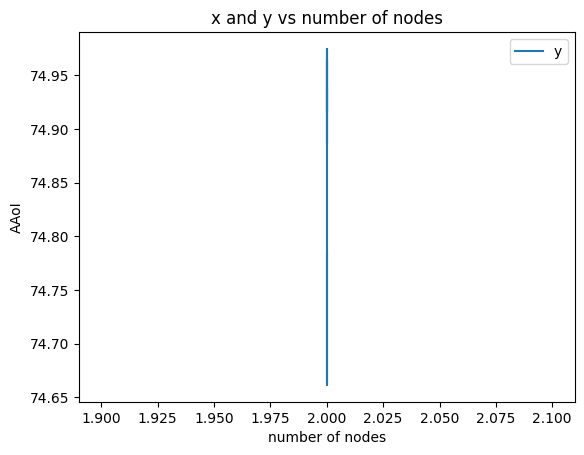

0.91
0.5805555555555557 74.83727674846446
0.8725
0.4171568627450983 74.98006165639907
0.84
0.33749999999999997 74.97372104650071
0.8125
0.2916666666666667 74.91326300868091
0.79
0.26309523809523816 74.90170558799846
0.7725
0.24478021978021977 74.8819402736154
0.76
0.23333333333333336 74.86000500668402
0.7525
0.227020202020202 74.96454166667515
0.75
0.225 74.96452500000849
0.7525
0.227020202020202 74.95947083334181
0.76
0.23333333333333336 74.94040930310949
0.7725000000000001
0.24478021978021985 74.95950416667515
0.79
0.26309523809523816 74.88931014348528
0.8125000000000001
0.29166666666666685 74.96149583334181


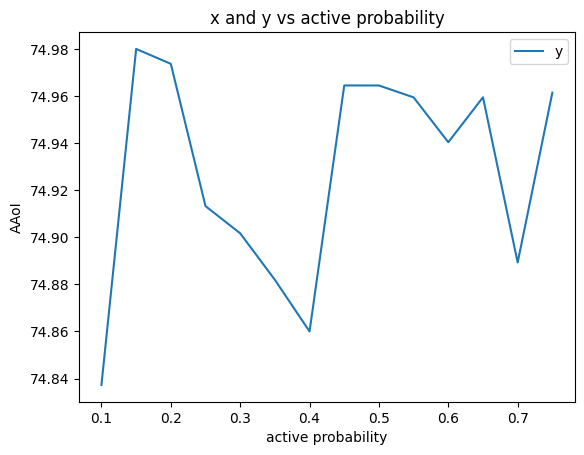

In [79]:
import numpy as np
import math
import argparse
import random

# import sys
from scipy import special as sp
import av_age

# from av_age import validate
import matplotlib.pyplot as plt
import bler
import snr
import pandas as pd
import tabulate as tab
import itertools as intert
import matplotlib.pyplot as plt
# Define the range of values for each parameter
num_nodes = range(2, 3)
active_prob = np.arange(0.1, 0.8, 0.05)


# Combine the parameters into a list
params = [num_nodes, active_prob]
combinations = list(intert.product(*params))

#%run -i av_age.py
def main(num_nodes, active_prob):
    lambda1 = 1
    # lambda1 = genlambda[j]
    num_events = 6000
    inter_arrival_times = (1 / lambda1) * (np.ones(num_events))
    arrival_timestamps = np.cumsum(inter_arrival_times)
    T = 10**-4
    N0 = 2 * (10**-15)
    d1 = 700  # disatance
    d2 = 700
    P1 = 500* (10**1)
    P2 = 500* (10**1)
    n = 300
    n1 = 300
    n2 = 300
    k1 = 100
    k2 = 100
    snr1 = snr.snr(N0, d1, P1)
    snr2 = snr.snr(N0, d2, P2)
    er1 = bler.blercal(snr1, n1, k1)
    er2 = bler.blercal(snr2, n2, k2)
    inter_service_times = (1 / lambda1) * np.ones((num_events))
    # Generating departure timestamps for the node 1
    server_timestamps_1 = np.zeros(num_events)
    departure_timestamps_s = np.zeros(num_events)
    su_p = active_prob * (1 - er1) * ((1 - active_prob) ** (num_nodes-1))
    er_f = 1 - su_p
    er_p = er_f + (er2 * (er_f - 1))
    print(er_p)
    for i in range(0, num_events):
        er_indi = int(random.random() > er_p)
        if er_indi == 0:
            departure_timestamps_s[i] = 0
            server_timestamps_1[i] = 0
        else:
            departure_timestamps_s[i] = arrival_timestamps[i] + inter_service_times[i]
            server_timestamps_1[i] = arrival_timestamps[i]
    # print(departure_timestamps_1,server_timestamps_1)
    dep = [x for x in departure_timestamps_s if x != 0]
    sermat = [x for x in server_timestamps_1 if x != 0]


    av_age_poisson_simulation, _, _ = av_age.av_age_func(sermat, dep)
    if er_p == 1:
        print("Theoretical average age is not defined")
    else:
        av_age_poisson_theoretical = (1 / lambda1) * (0.5 + (1 / (1 - er_p)))

    #print(av_age_poisson_simulation,av_age_poisson_theoretical)
    return av_age_poisson_theoretical, av_age_poisson_simulation
# Iterate over each parameter
for i, param in enumerate([num_nodes, active_prob]):
    # Create an empty list to store the results of the simulation for the current parameter
    results = []

    # Iterate over each combination of parameters and run the simulation
    for combo in combinations:
        # Unpack the combination into separate variables
        num_nodes, active_prob = combo
        # Run the simulation with the current parameters
        x, y = main(num_nodes, active_prob)
        print(x, y)
        # Append the result of the simulation to the results list
        results.append((combo[i], x, y))

    # Convert the results list to a numpy array
    results = np.array(results)

    # Define the name of the current parameter
    param_names = ['number of nodes', 'active probability']
    param_name = param_names[i]

    # Plot the result
    #plt.plot(results[:, 0], results[:, 1], label="x")
    plt.plot(results[:, 0], results[:, 2], label="y")
    plt.xlabel(param_name)
    plt.ylabel("AAoI")
    plt.title("x and y vs {}".format(param_name))
    plt.legend()
    plt.show()